# <center> <span style="color:purple"> Breast cancer prediction </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 
    
### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the Dataset & cleanup (if required).  

+ Develop classification models that can accurately predict whether a cancer type is malignant or benign.

+ Compare the evaluation metrics of different classification algorithms to determine which ones perform best in this context.

Plus: Explore patterns within subgroups (benign or malignant cases) using K-Means algorithm.
    
    
<span style="color:darkblue"> Description:  </span>  
<p style="text-align: justify;">  According to the World Health Organization (WHO), breast cancer is the most common cancer globally, with 2.3 million women diagnosed and 685,000 deaths from the disease in 2020. As of the end of that year, there were 7.8 million women worldwide who had been diagnosed with breast cancer in the previous five years and were still alive. 
With the increasing prevalence of breast cancer, understanding the factors that contribute to its development and progression, as well as developing effective prevention and treatment strategies, is vital. Early detection is also critical in improving the chances of successful treatment and recovery. Data analysis is a valuable tool for studying breast cancer, as it allows researchers to identify patterns and trends that can help improve our understanding of the disease being particularly valuable in predicting whether a breast tumor is benign or malignant. </p>

<p style="text-align: justify;"> 
After conducting preprocessing of the dataset to ensure its cleanliness and quality, as well as an exploratory analysis to gain a deeper understanding of its characteristics and underlying patterns, various classification algorithms were implemented to predict whether the cancer type is malignant or benign. The main focus was on evaluating the performance of these algorithms on the preprocessed data to accurately detect malignancy. Additionally, as a supplementary analysis, the K-Means algorithm was applied to explore potential patterns within the subgroups (benign or malignant cases). Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are used for visualization purposes to gain insights into the clustering results. Although the primary objective was classification, the application of K-Means clustering provided an opportunity to uncover any additional patterns that could offer further insights into the dataset. </p>


<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.

#### <span style="color:black"> Import libraries </span> 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

### Descriptive analysis
#### <span style="color:black"> Load data </span> 

In [2]:
#----------Load data-----------
df = pd.read_csv("../Data_sets/BreastCancer.csv")
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))
print('Features:', df.columns)
df.head()

Rows: 569 Columns: 33
Features: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### <span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;">  The dataset includes a column with a data type of "object" which have cathegorical data and another column containing null values. It has also been determined that the ID column does not provide relevant information for the project's objectives. As a result, it has been decided to remove these columns from the dataset to improve the accuracy and relevance of data analysis and the diagnosis data is critical and will be preserved as the target variable. </p>
 
<p style="text-align: justify;">  In order to obtain better results in the predictive models to be implemented, the data will be scaled. Also, some variables will be plotted to visualize their frequency distribution. </p>

In [4]:
#---------- Preprocessing data-----------
data = df.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)
data_diag = df['diagnosis']
display(data.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Statistical description
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Scaling data
scaler = StandardScaler()
data_new = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Number of benign and malignant cases:  Counter({'B': 357, 'M': 212})


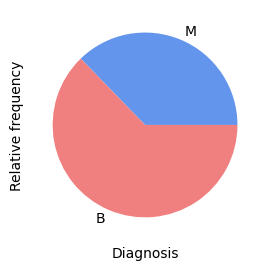

In [7]:
#Visualizing cathegorical data
ctr = Counter(data_diag)
print("Number of benign and malignant cases: ", ctr)
ctr_values = [value / data_diag.shape[0] for value in ctr.values()]
labels = ctr.keys()

plt.figure(figsize=(4, 3))
plt.pie(ctr_values, labels=labels, colors=['cornflowerblue', 'lightcoral'])
plt.ylabel("Relative frequency")
plt.xlabel("Diagnosis")

plt.show()

In [8]:
data_total = pd.concat([data_diag, data_new.iloc[:, 0:30]], axis=1)
data_M = data_total[data_total['diagnosis'] =='M']
data_B = data_total[data_total['diagnosis'] =='B']

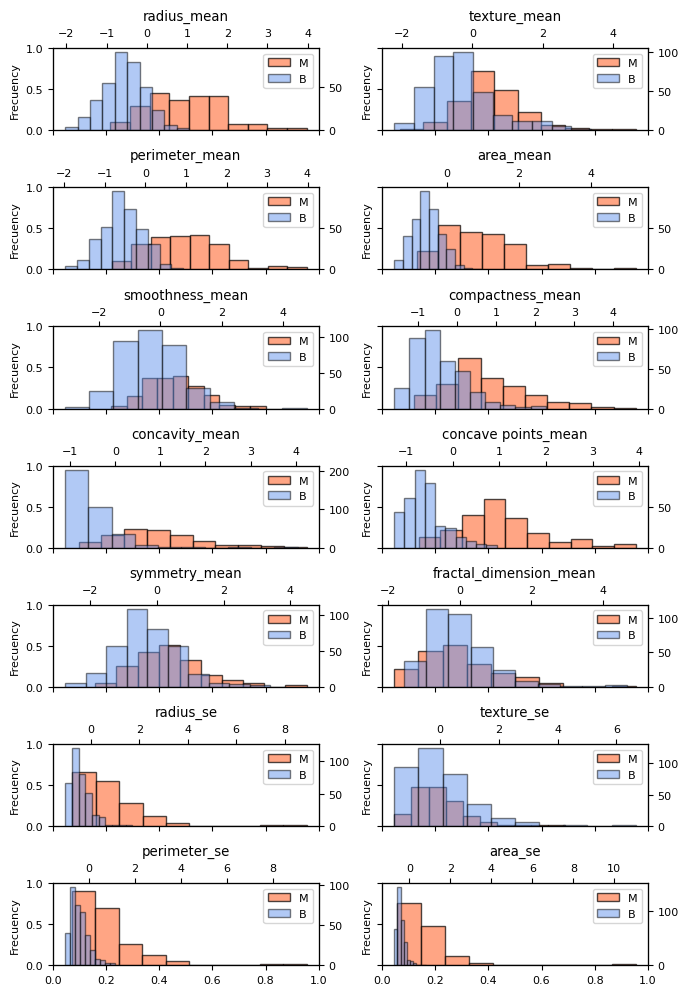

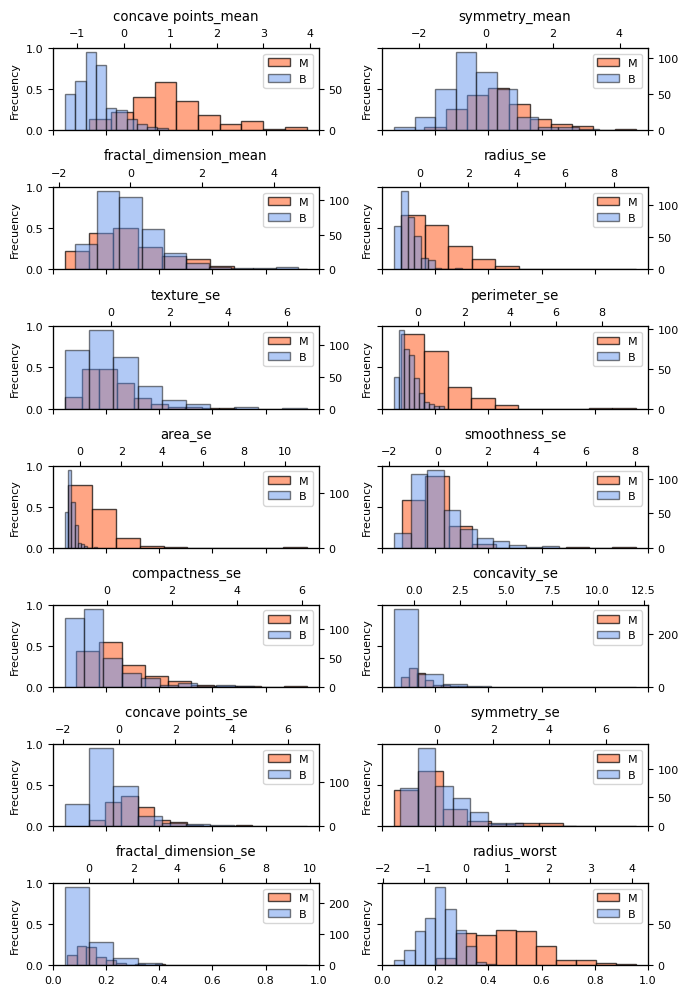

In [9]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  #if (i==6):
  ax.set_title(str(lista[i]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  ax.set_title(str(lista[i+7]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i+7]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i+7]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

#### <span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;"> The dataset shows a 60-40 split between malignant and benign cases, with the former comprising the majority. The next step involves examining the descriptive statistics of the dataset. </p>
    
<p style="text-align: justify;">  Texture, simmetry, smoothness and fractal dimension have similar distribution for malign and benign case. On the other hand, features as radius, area and perimeter (all of them are related) for benign case have a shift towards values below the mean, so tumors that are malignant tend to have a positive correlation with larger values of these parameters. </p>

 In addition, correlation matrix will be studied to determinate posible lineal relation between each feature.

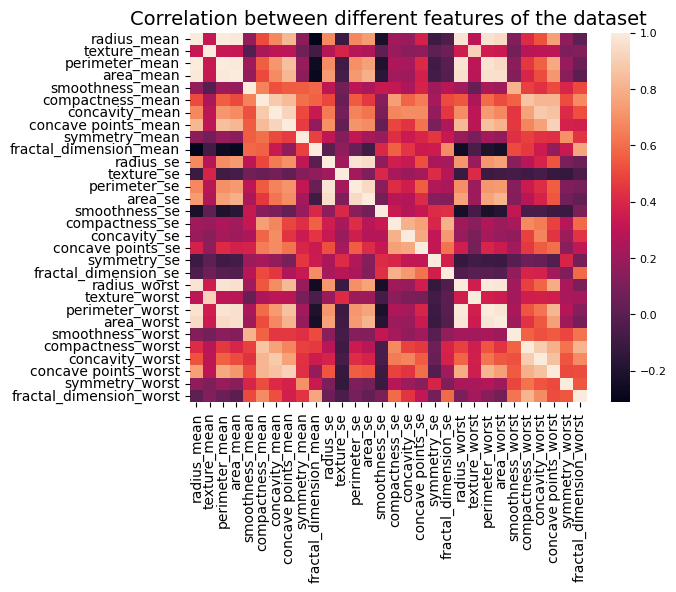

In [10]:
#Studying correlation
plt.title("Correlation between different features of the dataset", fontsize=14)
sns.heatmap(data_new.corr())
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

#### <span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;"> The correlation matrix suggests that variables such as area, perimeter and radius exhibit high correlation, which can be expected due to the mathematical relationship between area, perimeter, and radius. Although it might be beneficial to remove some of these variables, since this document does not have the guidance of a medical professional, all features will be retained. </p>
 

### <span style="color:black"> Classification models  </span> 
#### <span style="color:black">  k-nearest neighbors model predictor </span> 

In [11]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(data_new, data_diag, test_size=0.3, random_state=123)

0: Benign 
1: Malign
KNN precision:  0.98
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       103
           M       0.97      0.99      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



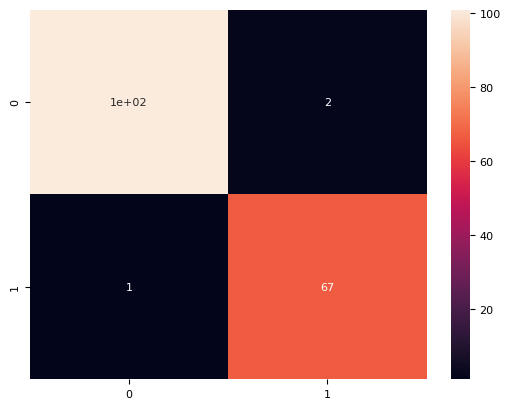

In [12]:
#KNN model predictor
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN = KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

#Evaluating predictor
print("0: Benign \n1: Malign", end='\n')
print("KNN precision: ", round(accuracy_score(y_test, y_pred), 2))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))


#### <span style="color:black"> Decision trees </span> 

0: Benign 
1: Malign
Tree score:  1.0
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       103
           M       0.98      0.96      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



<Axes: >

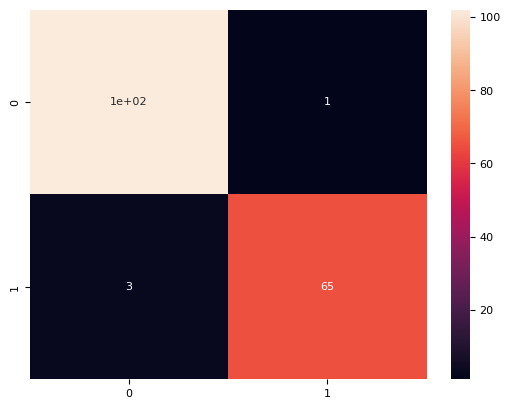

In [13]:
# Decision trees
tree = ExtraTreesClassifier(n_estimators=500, random_state=0)
tree.fit(X_train, y_train)
y_predic_tree = tree.predict(X_test)
print("0: Benign \n1: Malign", end='\n')
print("Tree score: ", tree.score(X_train, y_train)) #Good value so, continue
print(classification_report(y_test, y_predic_tree))
cm = confusion_matrix(y_test, y_predic_tree)
sns.heatmap(cm, annot=True)

#### <span style="color:black"> Gaussian Naive Bayes </span> 

0: Benign 
1: Malign
Naive Bayes score:  0.9590643274853801
              precision    recall  f1-score   support

           B       0.94      0.99      0.97       103
           M       0.98      0.91      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



<Axes: >

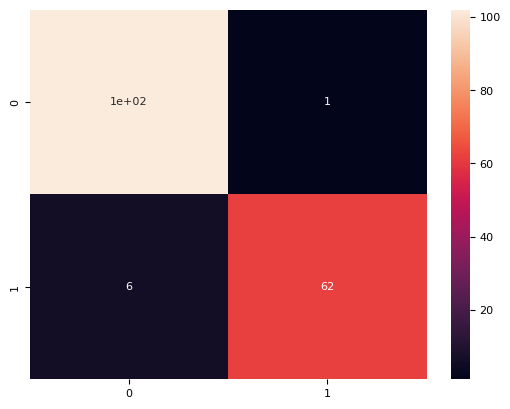

In [14]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predic_nb = nb.predict(X_test)
print("0: Benign \n1: Malign", end='\n')
print("Naive Bayes score: ",nb.score(X_test, y_test))
print(classification_report(y_test, y_predic_nb))
cm = confusion_matrix(y_test, y_predic_nb)
sns.heatmap(cm, annot=True)

<span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;">  The Naive Bayes model assumes that the features are conditionally independent and normally distributed. However, some features such as "area" and "perimeter" have a mathematical relationship with the "radius" value, and "concave points" does not have a Gaussian distribution. Thus, the Naive Bayes model yielded the worst score of 0.96 with 6 false negatives and 1 false positive. On the other hand, the decision tree model gave a score of 0.98 with 3 false negatives and 1 false positive, while the KNN model gave a score of 0.98 with 2 false positives and 1 false negative. The KNN model had the lowest number of false negative cases among the three methods.
For determining whether a cancer is malignant, all three models have a precision of 0.98. However, for benign diagnosis, the KNN model had the highest precision of 0.99, followed by the decision trees with 0.97 and the Naive Bayes model with 0.94. </p>
  <p style="text-align: justify;"> 
 A majority voting approach will be implemented to explore an alternative method for classifying malignant cases.</p>
 
 #### <span style="color:black"> Majority voting </span> 

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       103
           M       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.9824561403508771


<Axes: >

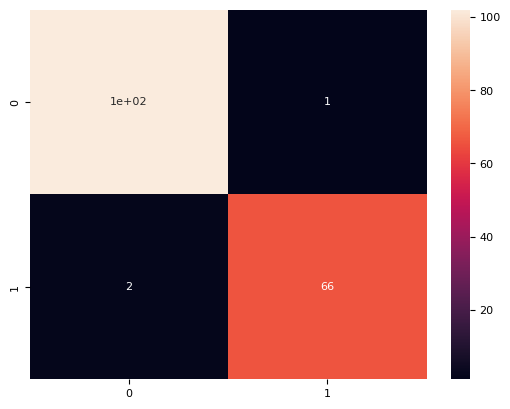

In [15]:
clf1 = KNeighborsClassifier(n_neighbors = 3)
clf2 = ExtraTreesClassifier(n_estimators=500, random_state=0)

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2)], voting='soft')
voting_clf.fit(X_train, y_train)
y_predic_voting = voting_clf.predict(X_test)
print(classification_report(y_test, y_predic_voting))
# evaluate the voting classifier on test data
score = voting_clf.score(X_test, y_test)
print(score)
cm = confusion_matrix(y_test, y_predic_voting)
sns.heatmap(cm, annot=True)

<span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;"> The implementation of majority voting resulted in a better performance in classifying malignant cases, increasing the precision score from 0.98 to 0.99. The precision score for benign cases remained at 0.98. Therefore, the use of ensemble learning through majority voting improved the classification of both malignant and benign cases of breast cancer. </p>

### <span style="color:black"> Conclusion </span> 

 <p style="text-align: justify;"> The mean values of cell radius, perimeter, area, compactness, concavity, and concave points can be utilized to classify breast cancer. A higher value of these features suggests malignant tumors. The availability of these features, which can be easily measured through various methods of medical imaging, can provide critical insights for early detection and treatment of breast cancer. This discovery can be especially valuable in resource-constrained settings where access to more advanced diagnostic tools is limited. The ability to identify malignancy based on readily available features can contribute to more efficient and effective patient management, ultimately leading to better patient outcomes.
However, when it comes to the distribution of texture, smoothness, symmetry, or fractal dimension values, there is no clear indication of a preference for one diagnosis over the other. </p>
  
<p style="text-align: justify;"> All of the models were able to classify the majority of cases with a precision of at least 94% in the classification task. However, the k-nearest neighbors model performed the best overall compared to the other models. By using ensemble learning with both KNN and decision tree models, it was possible to improve the precision of malignant tumor detection by 1%. </p>


<p style="text-align: justify;"> In summary, it was possible to identify the features that enable us to distinguish malignant tumors, as well as variables that exhibit similar behavior in both malignant and benign tumors. Furthermore, the k-nearest neighbors model was found to be effective for the classification of breast cancer. While there were minor differences in precision between the methods, with the best-performing method (k-nearest neighbors) outperforming the worst-performing method by less than 4%, this small improvement in performance can still be meaningful in the early detection and treatment of breast cancer. The performance of the k-nearest neighbors model in classifying malignant tumors can be further improved by employing an ensemble learning model.  </p>

<p style="text-align: justify;"> As the field of medical imaging continues to expand, there exist numerous prospects for future research to explore the potential of machine learning algorithms in analyzing more extensive and intricate medical imaging datasets. This paves the way for the discovery of new patterns and associations in medical data that were previously unrecognized, along with the enhancement of the accuracy of diagnoses and treatment decisions. Within the context of breast cancer, machine learning algorithms may be capable of identifying subtle imaging features that are not immediately apparent to human observers, which may lead to earlier and more precise diagnoses. Ultimately, sustained research efforts in this area may result in significant advancements in the diagnosis and treatment of breast cancer, and other medical conditions. </p>

 ## <span style="color:black"> Plus: tterns within the subgroups  </span> 
### <span style="color:black"> Dimensionality Reduction </span> 

 <p style="text-align: justify;"> The original dataset contains around 30 features, which can make it difficult to visualize the data due to the high dimensionality. To address this, we will use Principal Component Analysis (PCA) and t-SNE to reduce the dimensionality of the data, allowing for a more manageable and informative analysis of the results. </p>

 <p style="text-align: justify;"> In simpler terms, PCA is a method that identifies the most important features in the data and reduces the dimensionality while maintaining the key information. It is useful for visualizing the data, reducing noise, and improving analysis efficiency. On the other hand, t-SNE is a technique that focuses on preserving the local relationships between data points. It is especially effective in visualizing clusters or groups of similar data points and is commonly used for exploring data, identifying patterns, and gaining a deeper understanding of the data's structure. Unlike PCA, t-SNE does not provide a direct measure of the amount of information preserved after dimensionality reduction. </p>

 <p style="text-align: justify;"> It is important to note that clustering results can vary depending on the dimensionality reduction method used. Some methods may better capture certain patterns or structures in the data, which can influence the clustering models' ability to separate and group the data appropriately. Therefore, using multiple dimensionality reduction techniques and comparing the clustering results can provide a more robust evaluation and help better understand the data structure. </p>

#### <span style="color:black">  Principal Component Analysis (PCA) </span> 


(569, 2)

[0.44272026 0.18971182]


<Axes: >

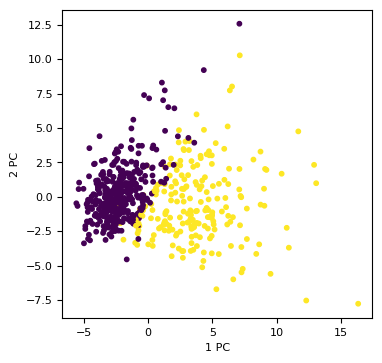

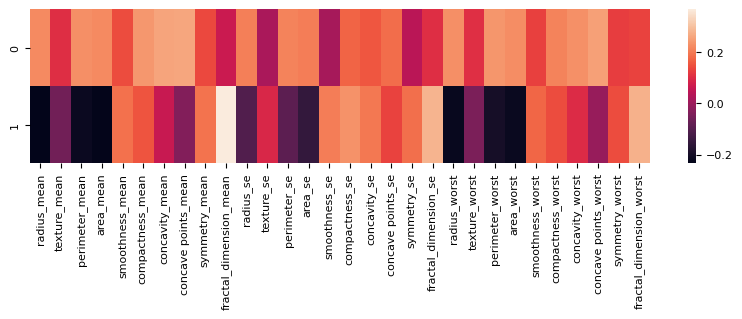

In [16]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_total.iloc[:, 1:31])
display(data_pca.shape)

# Plot PCA
target = data_total['diagnosis'].map({'M': 1, 'B': 0}) # Creating target variable
plt.figure(figsize=(4, 4))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, s=10)
plt.xlabel('1 PC')
plt.ylabel('2 PC')

print(pca.explained_variance_ratio_)
comp = pd.DataFrame(pca.components_, columns=data_total.columns[1:])
plt.figure(figsize=(10, 2))
sns.heatmap(comp)

#### <span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;"> PCA method shows two clearly differentiated groups using only 2 main axes. Although, the variance is maximized along PC1 (explains 44% of the variance) and PC2 (explains 19% of the variance). Together, they explain 63% of the variance. On the other hand, the heatmap shows how each feature describe each one of the two principal componets. zero principal component is described mostly by concavity, concave points, perimeter, following by area and radius, showing a positive correlation. First principal component has large positive associations with fractal dimension, smoothness, compactness and simmetry while have a negative associations with radius, perimeter and area. It is important to mention that it is not surprising that the PCA does not describe the data as ideally, considering that we retain highly correlated features. </p>

#### <span style="color:black">  T-SNE </span> 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.616457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.058846
[t-SNE] KL divergence after 1300 iterations: 0.780553


(569, 2)

Text(0, 0.5, '2 T-SNE')

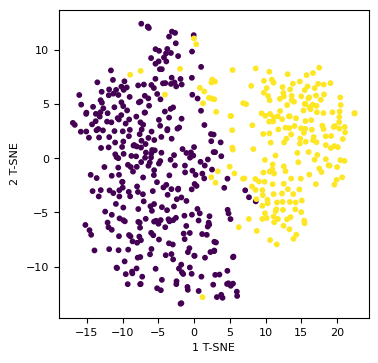

In [17]:
tsne = TSNE(verbose=1, perplexity=50, n_iter= 4000)
data_tsne = tsne.fit_transform(data_total.iloc[:, 1:31])
display(data_tsne.shape)

plt.figure(figsize=(4, 4))
plt.scatter(data_tsne[:, 0],data_tsne[:, 1], c=target, s=10)
plt.xlabel('1 T-SNE')
plt.ylabel('2 T-SNE')

#### <span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;"> The plotted graph corresponds to the data points separated based on their diagnosis values in a 2-dimensional space obtained by applying t-SNE to the original dataset. The t-SNE algorithm projects the high-dimensional data onto a lower-dimensional space while preserving the local structure. In this case, the diagnosis values serve as a criterion to segregate the data points into distinct regions. The close proximity of these zones indicates that there are similarities among the data points with similar diagnosis values.  </p>

#### <span style="color:black">  K-Means clustering </span> 

In [21]:
def clustering(X, Y1, Y2, diagnosis):
    range_n_clusters = [2, 3, 4, 5, 6]
    text = f"\033[1m\033[4m{diagnosis}\033[0m"
    centered_text = text.center(80)  # Adjust the width as needed
    print("\033[1m\033[36m\033[4m\033[48m" + centered_text + "\033[0m")

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(14, 4)

        
        # The silhouette coefficient can range from -1, 1, but in this example, all values lie within [-0.1, 1]
        ax1.set_xlim([-0.25, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters to demarcate them clearly.
        ax1.set_ylim([0, len(Y1) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 1 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=1, init='k-means++')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        calinski_harabasz_score = metrics.calinski_harabasz_score(X, cluster_labels)
        davies_bouldin_score = metrics.davies_bouldin_score(X, cluster_labels)

        print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)
        print("For n_clusters =", n_clusters, "The calinski_harabasz_score is:", calinski_harabasz_score)
        print("For n_clusters =", n_clusters, "The davies_bouldin_score is:", davies_bouldin_score)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)[: Y1.shape[0]]
        ax2.scatter(
            Y1[:, 0], Y1[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        ax3.scatter(
            Y2[:, 0], Y2[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        
        ax3.set_title("The visualization of the clustered data PCA.")
        ax3.set_xlabel("Feature space for the 1st feature PCA")
        ax3.set_ylabel("Feature space for the 2nd feature PCA")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

                                                                    
For n_clusters = 2 The average silhouette_score is: 0.28256640607120914
For n_clusters = 2 The calinski_harabasz_score is: 88.73406406505502
For n_clusters = 2 The davies_bouldin_score is: 1.7318345840846439
For n_clusters = 3 The average silhouette_score is: 0.1630795231714007
For n_clusters = 3 The calinski_harabasz_score is: 78.17651768034821
For n_clusters = 3 The davies_bouldin_score is: 1.806640749556495
For n_clusters = 4 The average silhouette_score is: 0.15081613455145124
For n_clusters = 4 The calinski_harabasz_score is: 70.48753665706462
For n_clusters = 4 The davies_bouldin_score is: 1.6873910315291742
For n_clusters = 5 The average silhouette_score is: 0.13939077760408508
For n_clusters = 5 The calinski_harabasz_score is: 65.06353613070819
For n_clusters = 5 The davies_bouldin_score is: 1.69212319635558
For n_clusters = 6 The average silhouette_score is: 0.12250047987953193
For n_clusters = 6 The calinski

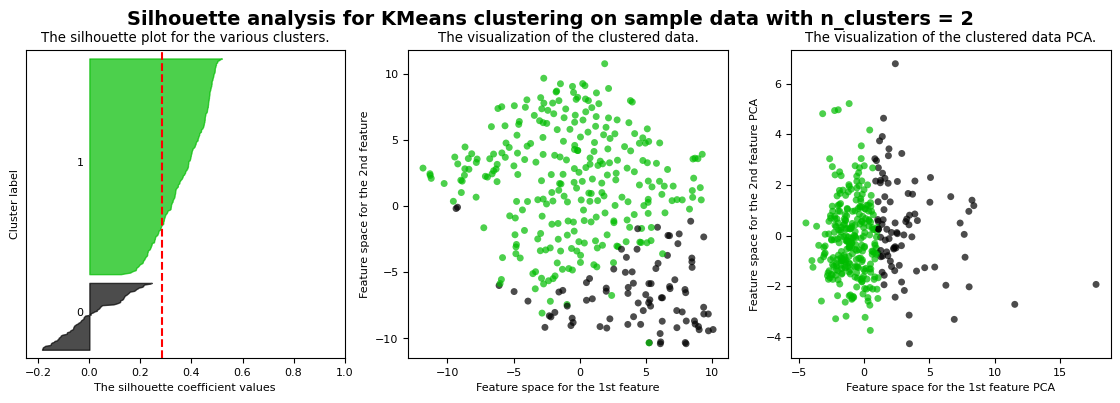

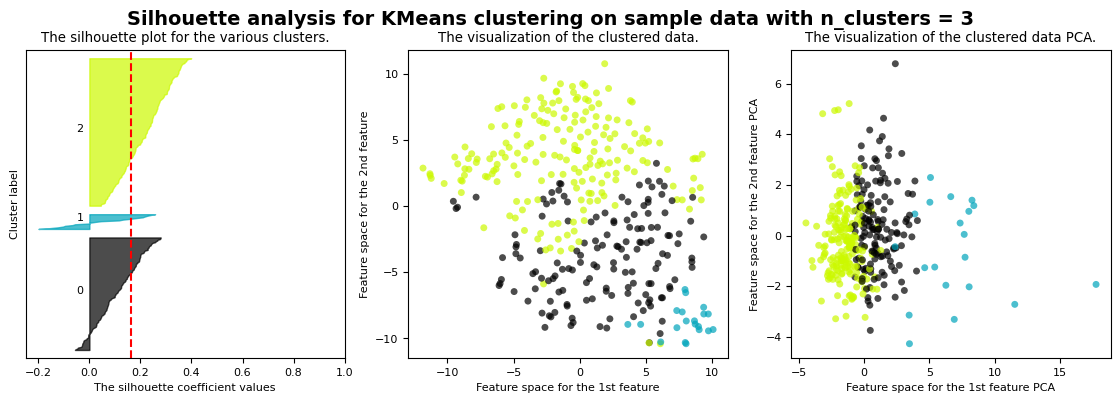

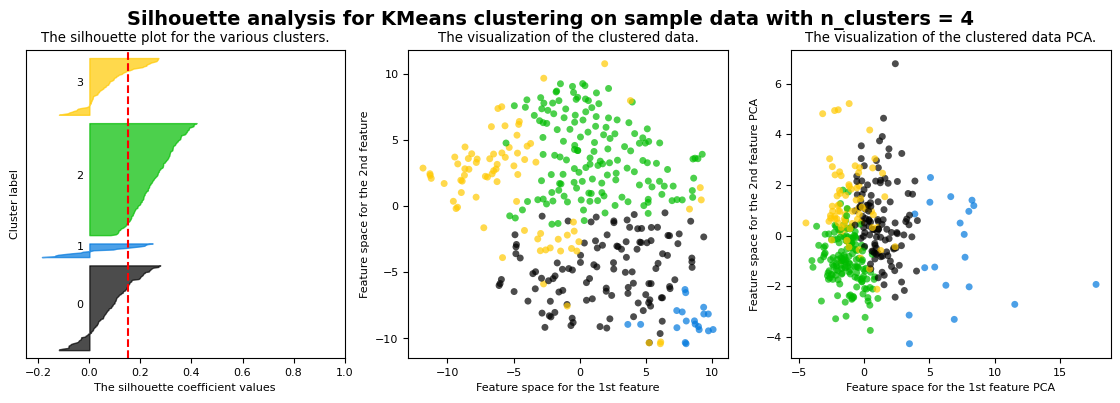

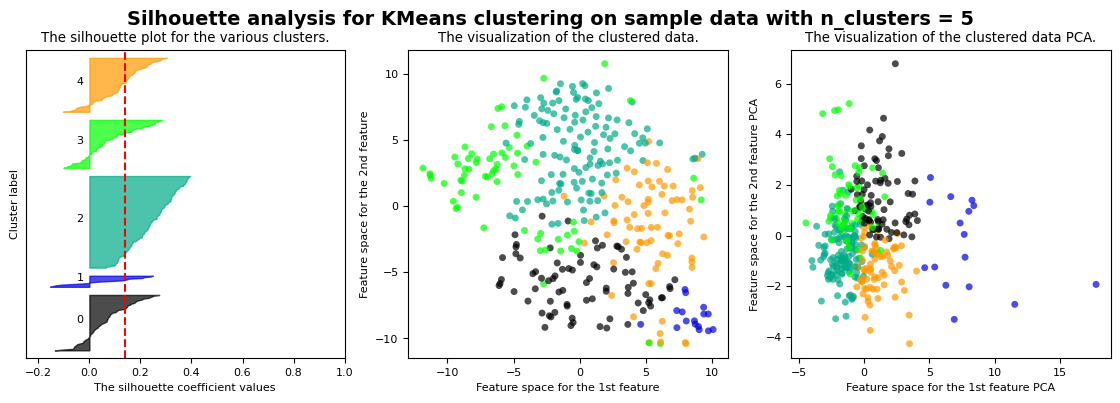

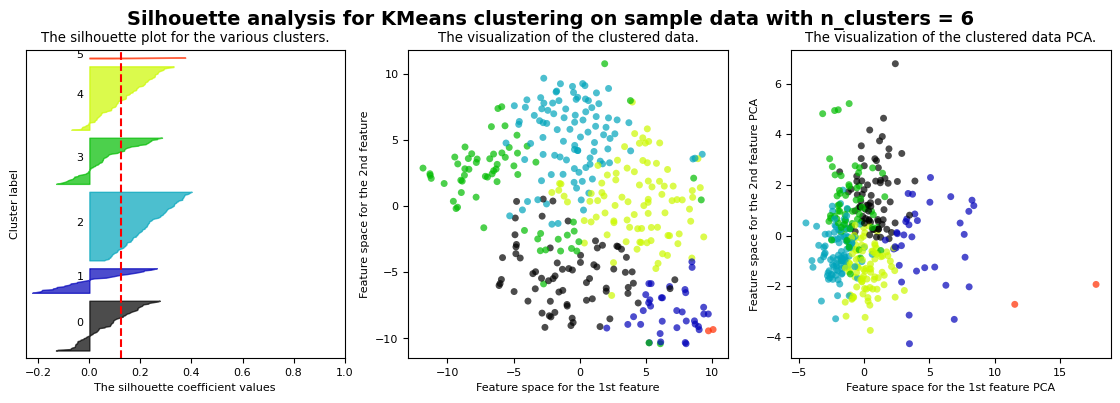

In [22]:
# Suppress warnings OMP_NUM_THREADS
warnings.filterwarnings("ignore")

X_B = data_B.iloc[:, 1:]
X_M = data_M.iloc[:, 1:]

#T-SNE data
tsne = TSNE(verbose=0, perplexity=50, n_iter= 4000)
tsneY_B = tsne.fit_transform(data_B.iloc[:, 1:])
tsneY_M = tsne.fit_transform(data_M.iloc[:, 1:])

#PCA data
pca = PCA(n_components=2)
pcaY_B = pca.fit_transform(data_B.iloc[:, 1:])
pcaY_M = pca.fit_transform(data_M.iloc[:, 1:])

clustering(X_B, tsneY_B,  pcaY_B, ' ')


#### <span style="color:darkblue"> Observations: </span>  

+ The silhouette score measures how well each sample in a cluster is assigned to that cluster compared to other clusters. The score ranges from -1 to 1, where a higher score indicates better-defined clusters. In this case, the silhouette scores are relatively low, ranging from 0.12 to 0.28, which suggests that the clusters are not well-separated or distinct.

+ The Calinski-Harabasz score calculates the ratio between the within-cluster dispersion and between-cluster dispersion. A higher score indicates better-defined, more separated clusters. The scores obtained here range from 59 to 88, which are moderate to good scores.

+ The Davies-Bouldin score measures the average similarity between each cluster and the most similar cluster, where lower values indicate better clustering. The scores obtained range from 1.54 to 1.81, which suggests that the clusters have a moderate level of separation and compactness.

<p style="text-align: justify;"> The Silhouette Score and Calinski-Harabasz Score both indicate that n_clusters = 2 performs the best. On the other hand, the Davies-Bouldin Score suggests that n_clusters = 6 provides the best performance.
It would be helpful to analyze the data further and potentially explore different clustering algorithms, evaluate different features, or perform additional data preprocessing to improve the clustering results. K-means clustering algorithm, in its current implementation, does not appear to effectively reveal patterns within subgroups of diagnoses. While K-means clustering is widely used for partitioning data into distinct groups, its reliance on the mean as the centroid can lead to limitations when dealing with complex or overlapping subgroups. This can result in suboptimal clustering performance and difficulties in accurately capturing intricate patterns within different diagnostic subgroups. Alternative clustering methods or more advanced algorithms may be required to better uncover and understand the underlying patterns within these subgroups of diagnoses. </p>